# $$Case Study : Insurance Premium Prediction$$

---



---

While taking insurance policy, an individual have to contact an insurance agent or insurance representative and provide required information to reach at the premium for the insurance policy. However, it is hectic and time-consuming process. To fill-up this gap, built this application which allows an individual to insert the required information and get the **Insurance Premium** as result.

Insurance Premium Prediction is a Machine Learning Algorithms based model. For the Problem statement data collected via [Kaggle platform](https://www.kaggle.com/noordeen/insurance-premium-prediction) and built an end-to-end deployment ML model. 

> ## $Problem Statement:$
- When we see insurance industries in business prospective i.e. If an individual willing to take insurance plan, so they have to call the insurance company's  helpline number and have to consult as per the need and different-different parameters, this is hectic process, also in this process, there are many of the negative points mentioned below.
 1. Sometimes they have to wait for long hold.
 2. May be they did not find the enough educated insurance representative, might lead to wrong information.
 3. Delay in taking final decision and many more.

- Hence trying to resolve the above problems using Machine Learning Algorithms
- Trying to build a user friendly ML model which can save time and effort for an individuals to reach at the insurance premium estimate with accuracy.


> The purposes of this case study is to look into different-different features (related to the insurance domain) and observe their relationship between/among them. Based on several features of an individual such as age, physical/family condition and location against their existing medical expense, to be used for predicting future medical expenses of individuals that help medical insurance or individuals to make decision on charging the premium.

> ## $Expected Solution:$
-  Build a solution that should be able to predict the premium of the individual health insurance based on given features in dataset.


# $Required Libraried:$

In [ ]:
import numpy as np                         # mathematical operations
import pandas as pd                        # read/manupulating data
import seaborn as sb                       # plotting/visualization
import matplotlib.pyplot as plt
%matplotlib inline

import warnings                            # Ignore warnings
warnings.filterwarnings('ignore')

from google.colab import data_table        # Better tabular visualization
data_table.enable_dataframe_formatter()
data_table.disable_dataframe_formatter()

# Split dataset-- Cross_Validation_Score-- Hyperparameter tuning
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

# For QQ plot
import scipy.stats as stat
import pylab 

# Standardization
from sklearn.preprocessing import StandardScaler

# Performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

from prettytable import PrettyTable  # Result in PrettyTable
import pickle                        # Save model

# $Loading Data:$

In [ ]:
# Google_Colab-- mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import pandas as pd

data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Case_Study_1/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# $Data Preprocessing:$

### Cheking basic information about the data.

In [ ]:
# Checking shape of the data
print('Shape of the dataset: ',data.shape)

Shape of the dataset:  (1338, 7)


In [ ]:
# Checking column names
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [ ]:
# Checking more data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataset contains 1338 observations (rows) and 7 features (columns).
- The dataset contains **4 numerical features** (age, bmi, children and expenses)
- **3 nominal features** (sex, smoker and region) that were converted into factors with numerical value designated for each level.

In [ ]:
# Checking general statistics for numerical features (age, bmi, children and expenses)
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In dataset
1. An individual's maximum age is 64 and minimum is 18.
2. Maximum bmi is 53.1.
3. An individuals have maximum 5 children.
4. Also observed that more number of children tends to have more expenses.
5. Average expenses is 13k.

In [ ]:
# Checking unique values for nominal/categorical features (sex, smoker and region)
print('Unique values for categorical features- \nsex: {} \nsmoker: {} \nregion: {}'.format(data['sex'].nunique(), 
                                                                              data['smoker'].nunique(), 
                                                                              data['region'].nunique()))

Unique values for categorical features- 
sex: 2 
smoker: 2 
region: 4


In [ ]:
# Checking unique value_counts for nominal/categorical features (sex, smoker and region)
print('Unique value_counts for categorical features- \n\n{} \n\n{} \n\n{}'.format(data['sex'].value_counts(),
                                                                data['smoker'].value_counts(), 
                                                                data['region'].value_counts()))

Unique value_counts for categorical features- 

male      676
female    662
Name: sex, dtype: int64 

no     1064
yes     274
Name: smoker, dtype: int64 

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


- **Number of samples** taken for male, female and region wise are balanced.

In [ ]:
# checking missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

- No missing values found.
- Since not filling missing values, hence there is no data leakage problem.

# $EDA:$

### Checking correlation:

```python
seaborn.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
```

For more detail click [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

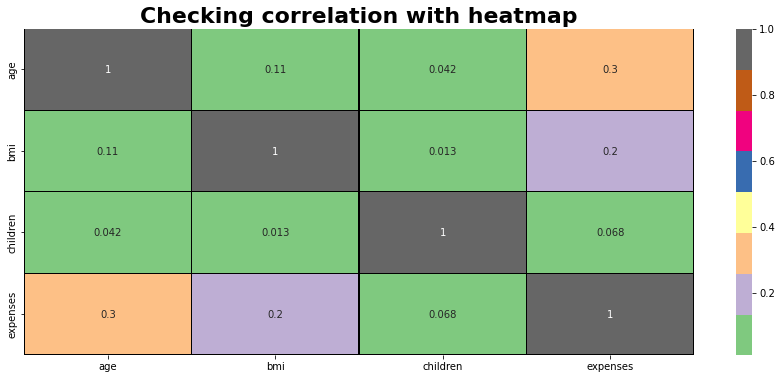

In [ ]:
# Checking correlation- plot the heatmap

corr= data.corr()
plt.figure(figsize=(15, 6))
plt.title('Checking correlation with heatmap', fontsize=22, fontweight='bold')
sb.heatmap(corr, annot= True, cmap= 'Accent', linecolor='black', linewidths= 0.05,
           xticklabels= corr.columns, yticklabels= corr.columns, cbar=True)

plt.show()

Analyzing heatmap -
1. Target feature is expenses.
2. No feature is negatively correlated, all are positively correlated.
3. **Age** is less correlated with bmi & children, a little bit positively correlated with expenses.
4. **bmi** is less positively correlated with expenses as compared to Age.
5. **Children** is less positively correlated with expenses as compared to Age and bmi.
6. As the conclusion, **Age** is the most significantly feature, which is correlated with the expenses.
7. Age, bmi & children are not highly correlated with each-other, hence cannot be dropped one of these feature.

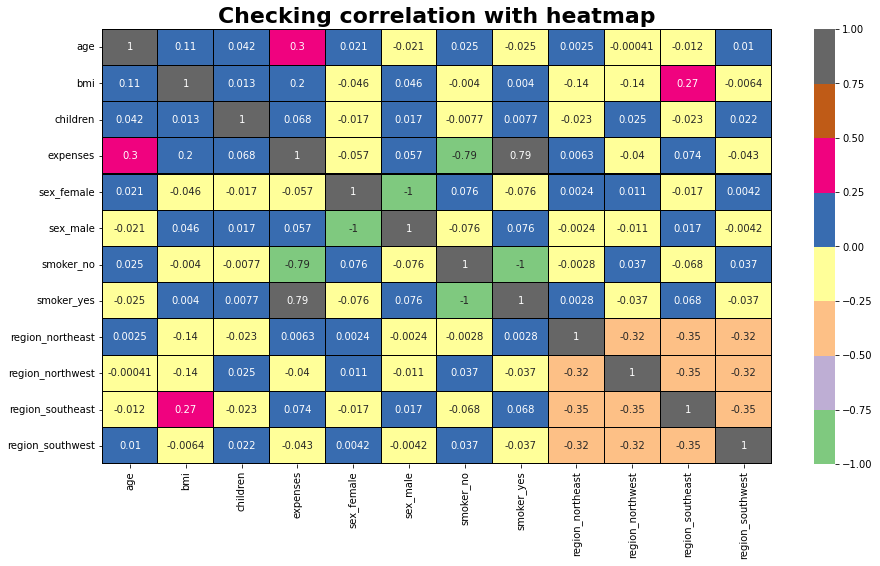

In [ ]:
# Checking correlation with dummy variables of categorical features

data_dummy= pd.get_dummies(data)
corr= data_dummy.corr()
plt.figure(figsize=(15, 8))
plt.title('Checking correlation with heatmap', fontsize=22, fontweight='bold')
sb.heatmap(corr, annot= True, cmap= 'Accent', linecolor='black', linewidths= 0.05,
           xticklabels= corr.columns, yticklabels= corr.columns, cbar=True)

plt.show()

Analyzing heatmap with all the dummy data -
1. **Age** significantly correlated with the expenses only, not correlated with any of the other features.
2. **BMI** is not significantly correlated with any of the other features. BMI is the most correlated with the region_southeast (0.27) and also a little bit correlated with the expenses (0.2).
3. **Children** is not significantly correlated with any of the other features. Individually it is correlated with expenses only (0.068).
4. **Sex** have two categories i.e. female & male.
   - **Female & Male** both of the features is not significantly correlated with any of the other features, even not correlated with expenses.
5. **Smoker** have two categories i.e. yes & no.
   - **Yes** it is not significantly correlated with any of the other features, individually it is **highly positively correlated with expenses** only (0.79).
   - **No** it is not significantly correlated with any of the other features, individually it is **highly negatively correlated with expenses** only (-0.79).
6. **Region** have four categories i.e. northeast, northwest, southeast & southwest.
   - These features are a little bit negatively correlated with each other.
   - However, region_southeast have a little bit higher expenses compared to the other region.


### Analysis of $Feature: Age$

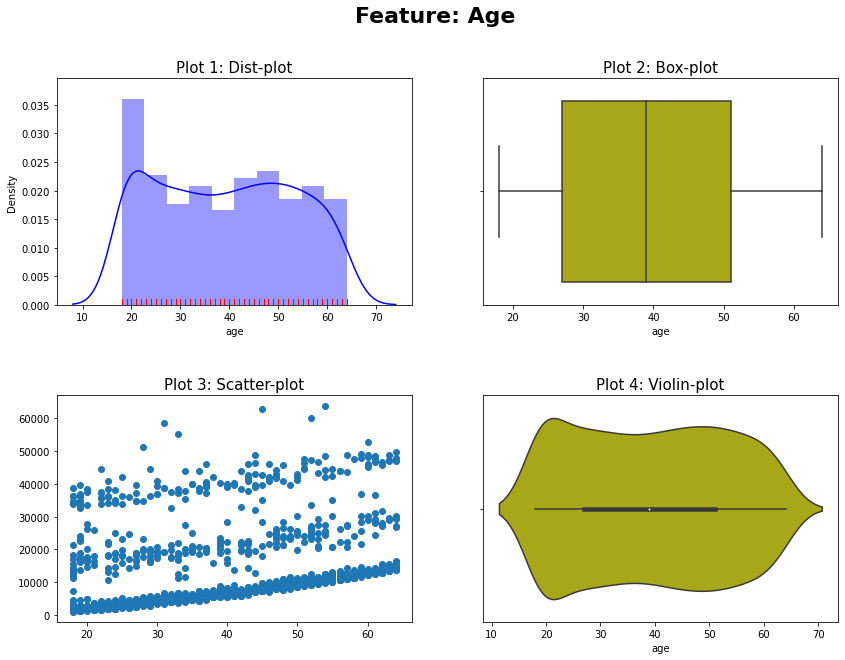

In [ ]:
plt.figure(figsize=(14, 10))
plt.suptitle('Feature: Age', fontsize=22, fontweight='bold')

# Adjusting space between/among subplots
plt.subplots_adjust(hspace=0.4)

# subplot_1
plt.subplot(2,2,1)
plt.title('Plot 1: Dist-plot', fontsize=15)
sb.distplot(data['age'], hist=True, bins=10, color='b', rug= True, rug_kws={'color': 'r'},
            kde=True)  # kde: kernel density estimator
                                   
# subplot_2
plt.subplot(2,2,2)
plt.title('Plot 2: Box-plot', fontsize=15)
sb.boxplot(data['age'], color='y')

# subplot_3
plt.subplot(2,2,3)
plt.title('Plot 3: Scatter-plot', fontsize=15)
plt.scatter(data['age'], data['expenses'])

# subplot_4
plt.subplot(2,2,4)
plt.title('Plot 4: Violin-plot', fontsize=15)
sb.violinplot(data['age'], color='y')

plt.show()                         

1. Plot 1: Dist-plot, shows that it is uniformly distributed, the minimum age is 18 & maximum age is 64.
2. Plot 2: Box-plot & Plot 4: Violin-plot, shows that there is no outlier present in age feature.
3. Plot 3: Scatter-plot, shows that as the age increases, slightly the expenses are higher.

### Analysis of $Feature: BMI$

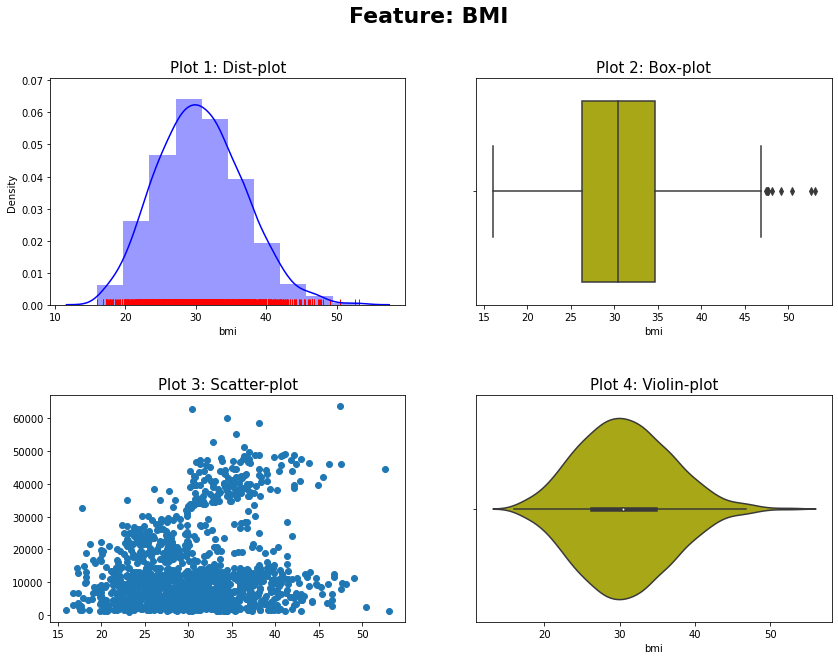

In [ ]:
plt.figure(figsize=(14, 10))
plt.suptitle('Feature: BMI', fontsize=22, fontweight='bold')

# Adjusting space between/among subplots
plt.subplots_adjust(hspace=0.4)

# subplot_1
plt.subplot(2,2,1)
plt.title('Plot 1: Dist-plot', fontsize=15)
sb.distplot(data['bmi'], hist=True, bins=10, color='b', rug= True, rug_kws={'color': 'r'},
            kde=True)  # kde: kernel density estimator
                                   
# subplot_2
plt.subplot(2,2,2)
plt.title('Plot 2: Box-plot', fontsize=15)
sb.boxplot(data['bmi'], color='y')

# subplot_3
plt.subplot(2,2,3)
plt.title('Plot 3: Scatter-plot', fontsize=15)
plt.scatter(data['bmi'], data['expenses'])

# subplot_4
plt.subplot(2,2,4)
plt.title('Plot 4: Violin-plot', fontsize=15)
sb.violinplot(data['bmi'], color='y')

plt.show()   

1. Plot 1: Dist-plot, shows that it is normally distributed.
2. Plot 2: Box-plot & Plot 4: Violin-plot, shows that there are outliers present in bmi feature.

### Analysis of $Feature: Children$

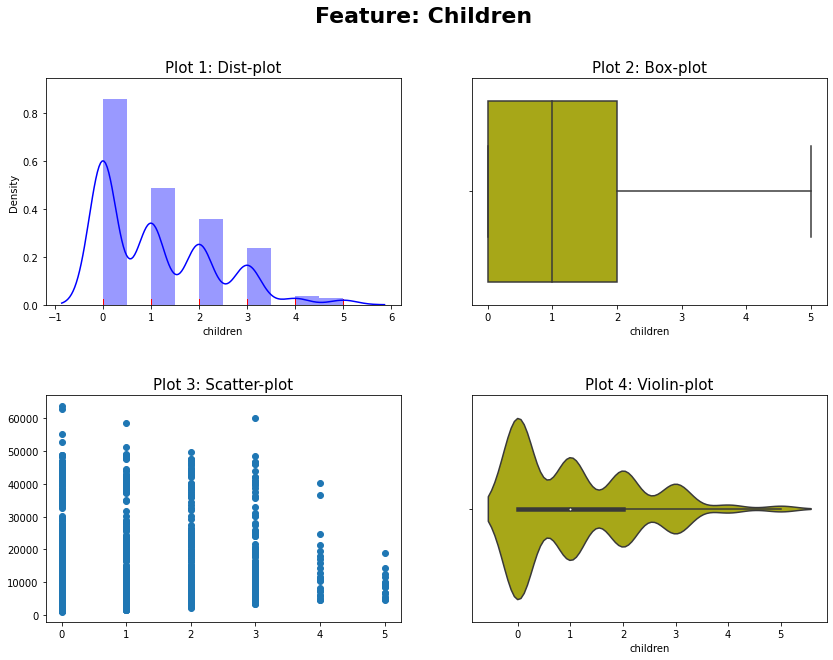

In [ ]:
plt.figure(figsize=(14, 10))
plt.suptitle('Feature: Children', fontsize=22, fontweight='bold')

# Adjusting space between/among subplots
plt.subplots_adjust(hspace=0.4)

# subplot_1
plt.subplot(2,2,1)
plt.title('Plot 1: Dist-plot', fontsize=15)
sb.distplot(data['children'], hist=True, bins=10, color='b', rug= True, rug_kws={'color': 'r'},
            kde=True)  # kde: kernel density estimator
                                   
# subplot_2
plt.subplot(2,2,2)
plt.title('Plot 2: Box-plot', fontsize=15)
sb.boxplot(data['children'], color='y')

# subplot_3
plt.subplot(2,2,3)
plt.title('Plot 3: Scatter-plot', fontsize=15)
plt.scatter(data['children'], data['expenses'])

# subplot_4
plt.subplot(2,2,4)
plt.title('Plot 4: Violin-plot', fontsize=15)
sb.violinplot(data['children'], color='y')

plt.show()   

1. Children is the ordinal feature.
2. It shows that the majority of the family have 1-2 children, however an individual number are the highest with no child.

### Regression plot: ```regplot()```

```python
seaborn.regplot( x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
```

For more detail click [seaborn.regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html).

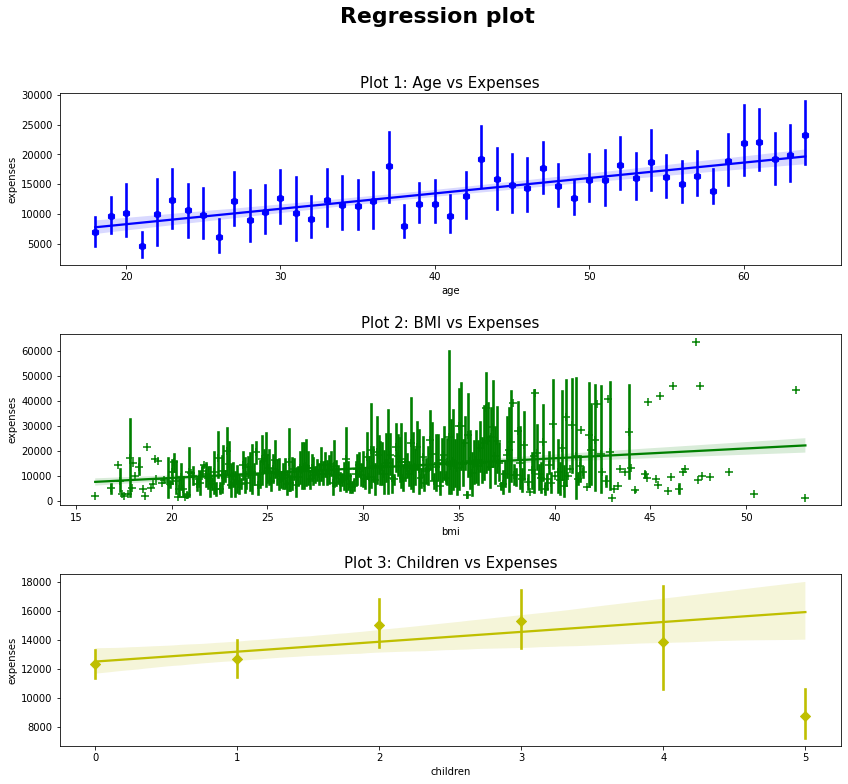

In [ ]:
# Regression plot

plt.figure(figsize=(14, 12))
plt.suptitle('Regression plot', fontsize=22, fontweight='bold')

# Adjusting space between/among subplots
plt.subplots_adjust(hspace=0.4)

# subplot_1
plt.subplot(3,1,1)
plt.title('Plot 1: Age vs Expenses', fontsize=15)
sb.regplot(x= 'age', y= 'expenses', data= data, color='b', x_estimator=np.mean, marker='h')

# subplot_2
plt.subplot(3,1,2)
plt.title('Plot 2: BMI vs Expenses', fontsize=15)
sb.regplot(x= 'bmi', y= 'expenses', data= data, color='g', x_estimator=np.mean, marker='+')

# subplot_3
plt.subplot(3,1,3)
plt.title('Plot 3: Children vs Expenses', fontsize=15)
sb.regplot(x= 'children', y= 'expenses', data= data, color='y', x_estimator=np.mean, marker='D')

plt.show()

Analyzing Regression plot -
1. **Age** is slightly linear with expenses.
2. However, unable to conclude linearity regarding bmi & children features with expenses.

### Categorical plot: ```catplot()```

```python
seaborn.catplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x105c7d9e0>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)
```

For detail click [seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html).

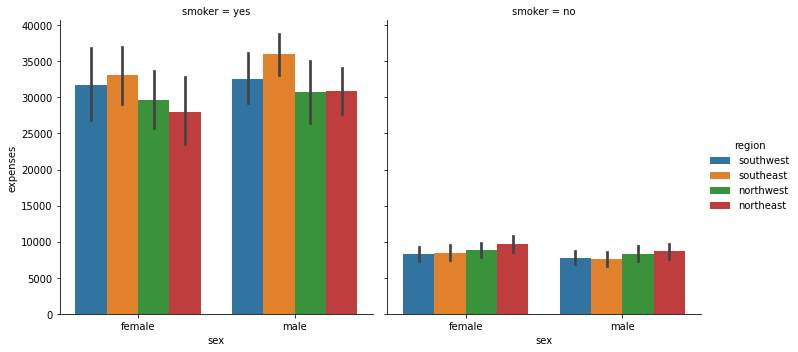

In [ ]:
# Categorical plot

sb.catplot(x='sex', y='expenses', col= 'smoker', hue= 'region', kind='bar', data=data)
plt.show()

1. Features **region** & **sex** wise not a major change in expenses, however **region_southeast** have a little bit **higher expenses** compared to the other region.
2. It is a **major conclusion** that **smoker have very high expenses compared to the non-smoker**.

# $Split Dataset:$

Splitting the dataset into train data & test data, it is a good practice to split the dataset before Feature Engineering to avoid the data leakage problem.

In [ ]:
# Independent & dependent features
X= data.drop('expenses', axis=1)   # Independent features
y= data['expenses']                # dependent feature

print('Independent features X_shape: ', X.shape)
print('dependent feature y_shape: ', y.shape)

Independent features X_shape:  (1338, 6)
dependent feature y_shape:  (1338,)


In [ ]:
X.head(5)

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest


In [ ]:
y.head(5)

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [ ]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.30, random_state=0)
print('X_train: {} ; X_test: {}'.format(X_train.shape, X_test.shape))
print('y_train: {} ; y_test: {}'.format(y_train.shape, y_test.shape))

X_train: (936, 6) ; X_test: (402, 6)
y_train: (936,) ; y_test: (402,)


# $Feature Engineering:$

Feature engineering is the process of using domain knowledge to extract features from raw data and use these extra features to improve the quality of results from a machine learning algorithms, compared with supplying only the raw data to the machine learning algorithms.

- In data preprocessing step, no missing values found in the dataset, here need to handle categorical features only. Categorical features can be divided into Nominal & Ordinal categorical features.

- In dataset, both of types categorical features present i.e. **Nominal Categorical Features - Sex, Smoker, Region** & **Ordinal Categorical Features - Children.**
 - **Children feature** is already arranged in order/rank.
 - For **features Sex, Smoker, Region** using **one-hot-encoding with dummy variable trap** since there aren’t huge categories present in any particular features.

### One-Hot-Encoding:

```python
pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
```

For more details click - [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [ ]:
X_train= pd.get_dummies(X_train, drop_first= True)
X_test= pd.get_dummies(X_test, drop_first= True)

In [ ]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1163,18,28.2,0,0,0,0,0,0
196,39,32.8,0,0,0,0,0,1
438,52,46.8,5,0,0,0,1,0
183,44,26.4,0,0,0,1,0,0
1298,33,27.5,2,1,0,1,0,0


In [ ]:
print('After One-hot-encoding Shape- \nX_train: {} ; X_test: {}'.format(X_train.shape, X_test.shape))

After One-hot-encoding Shape- 
X_train: (936, 8) ; X_test: (402, 8)


### Feature Transformation & Scaling:
Feature transformation or scaling is simply a function that transforms features from one representation to another. Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization.

Algo require feature scaling $-$
- Linear regresion - to converge faster
- KNN, K-mean clustering- for euclidean distance
- SVM

#### Q-Q plot:
- To check whether the feature is Gaussian/Normal distributed.
- If Q-Q plot falls in a straight line then it is Gaussian/Normal distributed.

In [ ]:
# Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

def QQ_plot(df):
  for feature in df.columns:
    print()
    print('Feature: ', str(feature))
    plot_data(df, feature)


Feature:  age


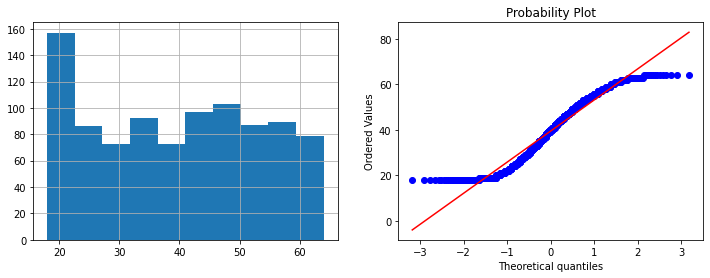


Feature:  bmi


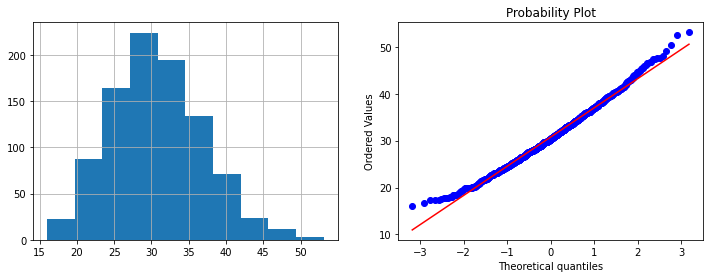


Feature:  children


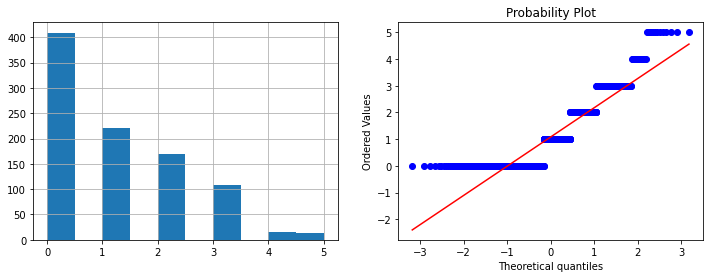


Feature:  sex_male


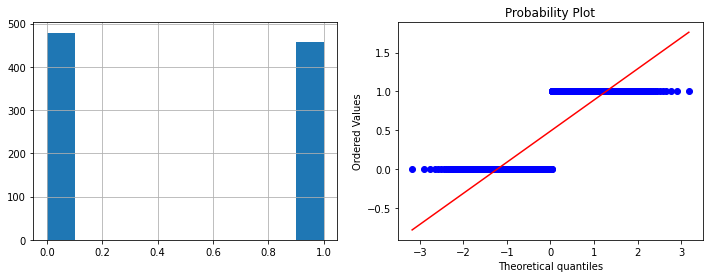


Feature:  smoker_yes


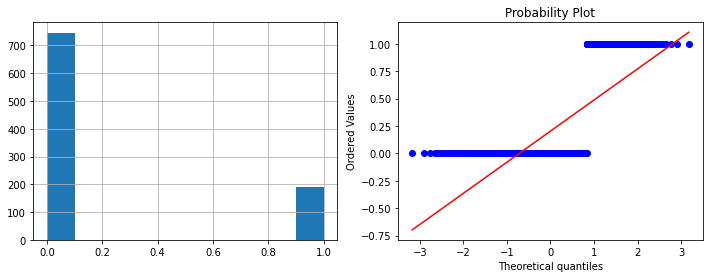


Feature:  region_northwest


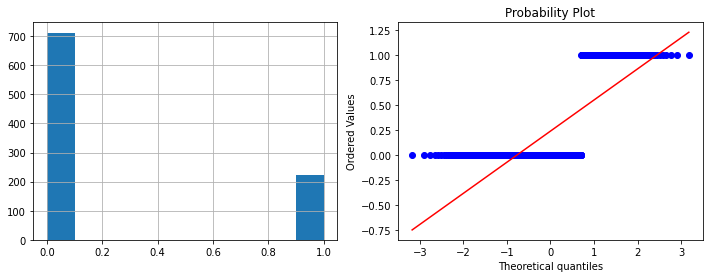


Feature:  region_southeast


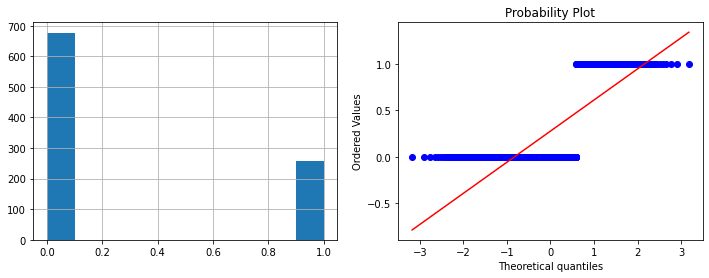


Feature:  region_southwest


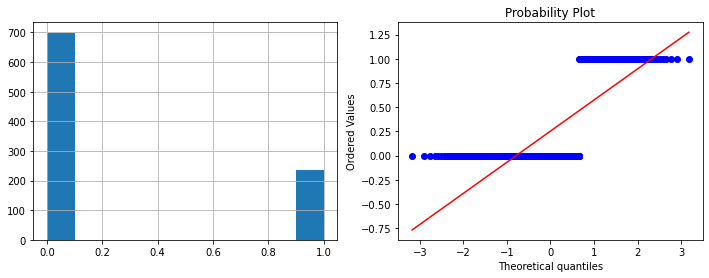

In [ ]:
QQ_plot(X_train)

- Only Age & BMI are the numerical features.
- As checked **QQ plot for Age**, line is not straight i.e. Age is not normally distributed (have to convert it into normal distribution), Normal distributed gives idea about--Accuracy & Performance.

In [ ]:
# creating copy to check feature transformation result
X_train_copy= X_train.copy()
X_test_copy= X_test.copy()

Applying Logarithmic Transformation


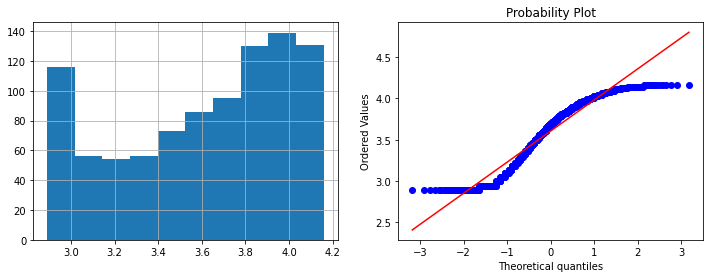


Applying Reciprocal Transformation


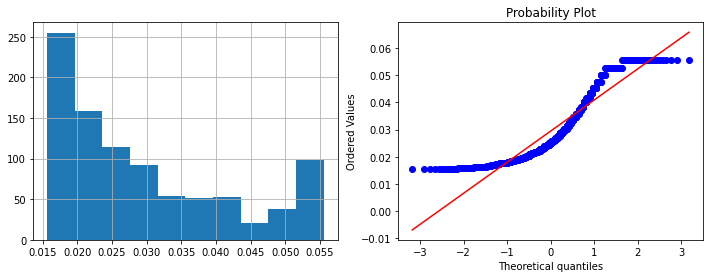


Applying Square Root Transformation


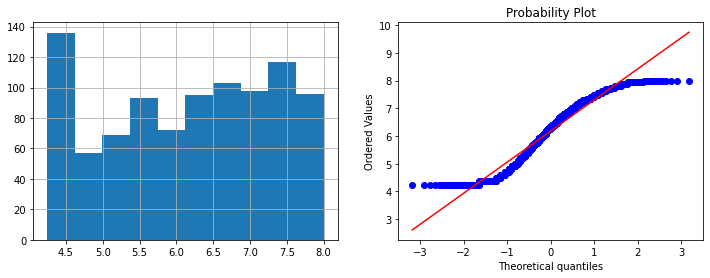


Applying Exponential Transformation


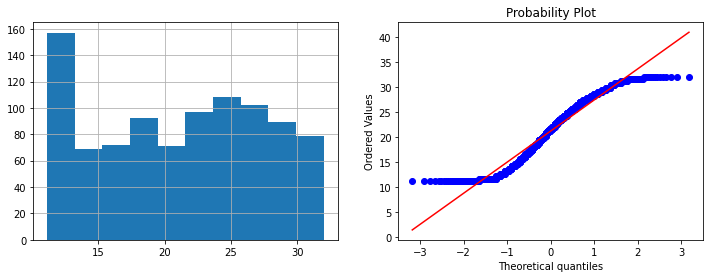


Applying Box-cox Transformation


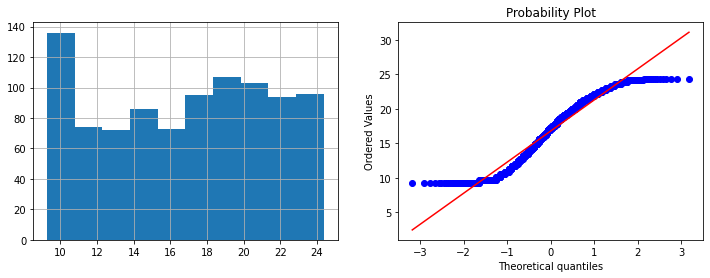

In [ ]:
# Logarithmic Transformation
X_train_copy['age_log']= np.log(X_train_copy['age'])  # Applying log-transformation
print('Applying Logarithmic Transformation')
plot_data(X_train_copy,'age_log')

# Reciprocal Transformation:
X_train_copy['Age_reciprocal']= 1/X_train_copy.age
print('\nApplying Reciprocal Transformation')
plot_data(X_train_copy,'Age_reciprocal')

# Square Root Transformation
X_train_copy['Age_sqrt']= X_train_copy.age**(1/2)
print('\nApplying Square Root Transformation')
plot_data(X_train_copy,'Age_sqrt')

# Exponential Transformation
X_train_copy['Age_exponential']= X_train_copy.age**(1/1.2)
print('\nApplying Exponential Transformation')
plot_data(X_train_copy,'Age_exponential')

# Box-cox Transformation
# λ value calculated by stat.boxcox()
X_train_copy['Age_Boxcox'],parameters= stat.boxcox(X_train_copy['age'])
print('\nApplying Box-cox Transformation')
plot_data(X_train_copy,'Age_Boxcox')

- QQ plot is not a straight line for any of the transformation techniques, however **Exponential Transformation** is the best result amoung all, hence Age feature will be replaced by this.

In [ ]:
# X_test Exponential Transformation
X_test_copy['Age_exponential']= X_test_copy.age**(1/1.2)

In [ ]:
# Replacing feature Age with Age_exponential
X_train.age = X_train_copy.Age_exponential
X_test.age = X_test_copy.Age_exponential

- As checked **QQ plot for BMI**, line is almost straight, however there are a little bit skewness, the same seen in EDA as outlier.

In [ ]:
# checking skewness
X_train.bmi.skew()

0.3411192501432953

#### Standardization:
**Standardization** comes into picture when features of input data set have large differences between their ranges or simply when they are measured in different measurement units. E.g.- Pounds, Meters, Miles … etc.

- Need to bring, all the variables or features to a similar scale.
- standardization means centering the variable at zero. 
  - $Z= (x-\bar{x})/std.dev$ ; $\bar{x}$ - mean

In [ ]:
# from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()        # Initialize
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

- Only transform apply for test data since whatever parameters applied to fit for train data, same needs to be applied on test data to overcome overfitting.

# $Performance Metrics :$

For the case study, performance metrics RMSE, MAE & Adjusted R2 score selected.
  - RMSE & MAE to see outlier impact and compare it.
  - In feature engineering, not creating huge number of new features, hence using R2 score as performance metrics.

```python
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
RMSE= mean_squared_error(y_test, y_predict, squared=False)
MAE= mean_absolute_error(y_test, y_predict)
R2_Score= r2_score(y_test, y_predict)
```

# $Model Building :$
**$fit()$** for training and **$predict()$** for test.

## Models

### Linear Regression Model $-$

In [ ]:
# from sklearn.linear_model import LinearRegression
Model_Linear= LinearRegression()
Model_Linear.fit(X_train, y_train)                  # train data .fit()
Model_Linear_pred= Model_Linear.predict(X_test)     # test data .predict()

# Performance Metrics
Linear_Reg_RMSE= np.round(mean_squared_error(y_test, Model_Linear_pred, squared=False), 3)
Linear_Reg_MAE= np.round(mean_absolute_error(y_test, Model_Linear_pred), 3)
Linear_Reg_R2_Score= np.round(r2_score(y_test, Model_Linear_pred)*100, 2)
print('RMSE: ', Linear_Reg_RMSE)
print('MAE: ', Linear_Reg_MAE)
print('R2_Score: ', Linear_Reg_R2_Score)

RMSE:  5790.867
MAE:  4029.379
R2_Score:  78.97


### Support Vector Machine Regression $-$

In [ ]:
# from sklearn.svm import SVR
Model_SVR= SVR()
Model_SVR.fit(X_train, y_train)                # train data .fit()
Model_SVR_pred= Model_SVR.predict(X_test)      # test data .predict()

# Performance Metrics
SVR_RMSE= np.round(mean_squared_error(y_test, Model_SVR_pred, squared=False), 3)
SVR_MAE= np.round(mean_absolute_error(y_test, Model_SVR_pred), 3)
SVR_R2_Score= np.round(r2_score(y_test, Model_SVR_pred)*100, 2)
print('RMSE: ', SVR_RMSE)
print('MAE: ', SVR_MAE)
print('R2_Score: ', SVR_R2_Score)

RMSE:  13160.977
MAE:  8685.885
R2_Score:  -8.62


### Decision Tree Regression $-$

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
Model_DT= DecisionTreeRegressor()
Model_DT.fit(X_train, y_train)                # train data .fit()
Model_DT_pred= Model_DT.predict(X_test)       # test data .predict()

# Performance Metrics
DT_RMSE= np.round(mean_squared_error(y_test, Model_DT_pred, squared=False), 3)
DT_MAE= np.round(mean_absolute_error(y_test, Model_DT_pred), 3)
DT_R2_Score= np.round(r2_score(y_test, Model_DT_pred)*100, 2)
print('RMSE: ', DT_RMSE)
print('MAE: ', DT_MAE)
print('R2_Score: ', DT_R2_Score)

RMSE:  6658.829
MAE:  3123.071
R2_Score:  72.2


### Random Forest Regressor $-$

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
Model_RF= RandomForestRegressor()
Model_RF.fit(X_train, y_train)                # train data .fit()
Model_RF_pred= Model_RF.predict(X_test)       # test data .predict()

# Performance Metrics
RF_RMSE= np.round(mean_squared_error(y_test, Model_RF_pred, squared=False), 3)
RF_MAE= np.round(mean_absolute_error(y_test, Model_RF_pred), 3)
RF_R2_Score= np.round(r2_score(y_test, Model_RF_pred)*100, 2)
print('RMSE: ', RF_RMSE)
print('MAE: ', RF_MAE)
print('R2_Score: ', RF_R2_Score)

RMSE:  4714.014
MAE:  2780.685
R2_Score:  86.07


### Gradient Boosting Regressor $-$

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
Model_GB= GradientBoostingRegressor()
Model_GB.fit(X_train, y_train)                # train data .fit()
Model_GB_pred= Model_GB.predict(X_test)       # test data .predict()

# Performance Metrics
GB_RMSE= np.round(mean_squared_error(y_test, Model_GB_pred, squared=False), 3)
GB_MAE= np.round(mean_absolute_error(y_test, Model_GB_pred), 3)
GB_R2_Score= np.round(r2_score(y_test, Model_GB_pred)*100, 2)
print('RMSE: ', GB_RMSE)
print('MAE: ', GB_MAE)
print('R2_Score: ', GB_R2_Score)

RMSE:  4285.81
MAE:  2603.198
R2_Score:  88.48


### StackingRegressor $-$

```Python
from sklearn.ensemble import StackingRegressor
sklearn.ensemble.StackingRegressor(estimators, final_estimator=None, *, cv=None, n_jobs=None, passthrough=False, verbose=0)

```

For more detail click [sklearn.ensemble.StackingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html).

In [ ]:
# from sklearn.ensemble import StackingRegressor

estimators = [('Model_Linear', Model_Linear), ('Model_SVR', Model_SVR), 
              ('Model_DT', Model_DT), ('Model_RF', Model_RF), ('Model_GB', Model_GB)]

Model_Stack_Regressor = StackingRegressor(estimators= estimators, 
                                          final_estimator= RandomForestRegressor(n_estimators=10, 
                                                                                 random_state=42))
                              
Model_Stack_Regressor.fit(X_train, y_train)                # train data .fit()
Model_Stack_Regressor_pred= Model_Stack_Regressor.predict(X_test)       # test data .predict()

# Performance Metrics
Stack_Reg_RMSE= np.round(mean_squared_error(y_test, Model_Stack_Regressor_pred, squared=False), 3)
Stack_Reg_MAE= np.round(mean_absolute_error(y_test, Model_Stack_Regressor_pred), 3)
Stack_Reg_R2_Score= np.round(r2_score(y_test, Model_Stack_Regressor_pred)*100, 2)
print('RMSE: ', Stack_Reg_RMSE)
print('MAE: ', Stack_Reg_MAE)
print('R2_Score: ', Stack_Reg_R2_Score)

RMSE:  4743.886
MAE:  2676.99
R2_Score:  85.89


## Summarizing Models Result

In [ ]:
# from prettytable import PrettyTable

x= PrettyTable(['Model','RMSE', 'MAE', 'R2_Score'])
x.add_row(['LinearRegression', Linear_Reg_RMSE, Linear_Reg_MAE, Linear_Reg_R2_Score])
x.add_row(['SupportVectorRegression', SVR_RMSE, SVR_MAE, SVR_R2_Score])
x.add_row(['DecisionTreeRegressor', DT_RMSE, DT_MAE, DT_R2_Score])
x.add_row(['RandomForestRegressor', RF_RMSE, RF_MAE, RF_R2_Score])
x.add_row(['GradientBoostingRegressor', GB_RMSE, GB_MAE, GB_R2_Score])
x.add_row(['StackingRegressor', Stack_Reg_RMSE, Stack_Reg_MAE, Stack_Reg_R2_Score])

print('Models Result :')
print(x)

Models Result :
+---------------------------+-----------+----------+----------+
|           Model           |    RMSE   |   MAE    | R2_Score |
+---------------------------+-----------+----------+----------+
|      LinearRegression     |  5790.867 | 4029.379 |  78.97   |
|  SupportVectorRegression  | 13160.977 | 8685.885 |  -8.62   |
|   DecisionTreeRegressor   |  6658.829 | 3123.071 |   72.2   |
|   RandomForestRegressor   |  4714.014 | 2780.685 |  86.07   |
| GradientBoostingRegressor |  4285.81  | 2603.198 |  88.48   |
|     StackingRegressor     |  4743.886 | 2676.99  |  85.89   |
+---------------------------+-----------+----------+----------+


- As comparing RMSE & MAE, MAE giving less error i.e. handling outlier in a better way compared to the RMSE.
- The above R2_Score/accuracy is not the actual accuracy, this may be overfitting resultant. For correct accuracy, need to check **Cross_Validation_Score**.

## Cross_Validation_Score :

In [ ]:
# from sklearn.model_selection import cross_val_score

Linear_Reg_CV= cross_val_score(Model_Linear, X_train, y_train, cv=5)
SVR_CV= cross_val_score(Model_SVR, X_train, y_train, cv=5)
DT_CV= cross_val_score(Model_DT, X_train, y_train, cv=5)
RF_CV= cross_val_score(Model_RF, X_train, y_train, cv=5)
GB_CV= cross_val_score(Model_GB, X_train, y_train, cv=5)
Stack_Reg_CV= cross_val_score(Model_Stack_Regressor, X_train, y_train, cv=5)

Linear_Reg_CV_scr= np.round((Linear_Reg_CV.mean()*100),2)
SVR_CV_scr= np.round((SVR_CV.mean()*100),2)
DT_CV_scr= np.round((DT_CV.mean()*100),2)
RF_CV_scr= np.round((RF_CV.mean()*100),2)
GB_CV_scr= np.round((GB_CV.mean()*100),2)
Stack_Reg_CV_scr= np.round((Stack_Reg_CV.mean()*100),2)


y= PrettyTable(['Model','cross_val_score'])
y.add_row(['LinearRegression', Linear_Reg_CV_scr])
y.add_row(['SupportVectorRegression', SVR_CV_scr])
y.add_row(['DecisionTreeRegressor', DT_CV_scr])
y.add_row(['RandomForestRegressor', RF_CV_scr])
y.add_row(['GradientBoostingRegressor', GB_CV_scr])
y.add_row(['StackingRegressor', Stack_Reg_CV_scr])

print('Cross_validation_score :')
print(y)

Cross_validation_score :
+---------------------------+-----------------+
|           Model           | cross_val_score |
+---------------------------+-----------------+
|      LinearRegression     |      72.05      |
|  SupportVectorRegression  |      -9.91      |
|   DecisionTreeRegressor   |      65.45      |
|   RandomForestRegressor   |      80.47      |
| GradientBoostingRegressor |      83.35      |
|     StackingRegressor     |      80.93      |
+---------------------------+-----------------+


- Best model is the one, which have minimum difference between R2_Score/Accuracy_score and Cross_val_score. 
- SVR giving negative result, hence ignoring this model.

## Best Model:

In [ ]:
z= PrettyTable(['Model','R2_Score - cross_val_score'])
z.add_row(['LinearRegression', np.round((Linear_Reg_R2_Score - Linear_Reg_CV_scr), 2)])
z.add_row(['DecisionTreeRegressor', np.round((DT_R2_Score - DT_CV_scr), 2)])
z.add_row(['RandomForestRegressor', np.round((RF_R2_Score - RF_CV_scr), 2)])
z.add_row(['GradientBoostingRegressor', np.round((GB_R2_Score - GB_CV_scr), 2)])
z.add_row(['StackingRegressor', np.round((Stack_Reg_R2_Score - Stack_Reg_CV_scr), 2)])

print('Best Model = minimum(R2_Score - cross_val_score)')
print(z)

Best Model = minimum(R2_Score - cross_val_score)
+---------------------------+----------------------------+
|           Model           | R2_Score - cross_val_score |
+---------------------------+----------------------------+
|      LinearRegression     |            6.92            |
|   DecisionTreeRegressor   |            6.75            |
|   RandomForestRegressor   |            5.6             |
| GradientBoostingRegressor |            5.13            |
|     StackingRegressor     |            4.96            |
+---------------------------+----------------------------+


minimum(R2_Score - cross_val_score) = 4.96 i.e. **StackingRegressor** is the best model.

# $Overall Summary :$

In [ ]:
k= PrettyTable(['Model', 'R2_Score', 'cross_val_score', 'R2_Score - cross_val_score'])
k.add_row(['LinearRegression', Linear_Reg_R2_Score, Linear_Reg_CV_scr, np.round((Linear_Reg_R2_Score - Linear_Reg_CV_scr), 2)])
k.add_row(['DecisionTreeRegressor',  DT_R2_Score, DT_CV_scr, np.round((DT_R2_Score - DT_CV_scr), 2)])
k.add_row(['RandomForestRegressor', RF_R2_Score, RF_CV_scr, np.round((RF_R2_Score - RF_CV_scr), 2)])
k.add_row(['GradientBoostingRegressor', GB_R2_Score, GB_CV_scr, np.round((GB_R2_Score - GB_CV_scr), 2)])
k.add_row(['StackingRegressor', Stack_Reg_R2_Score, Stack_Reg_CV_scr, np.round((Stack_Reg_R2_Score - Stack_Reg_CV_scr), 2)])

print('Overall Summary:')
print(k)

Overall Summary:
+---------------------------+----------+-----------------+----------------------------+
|           Model           | R2_Score | cross_val_score | R2_Score - cross_val_score |
+---------------------------+----------+-----------------+----------------------------+
|      LinearRegression     |  78.97   |      72.05      |            6.92            |
|   DecisionTreeRegressor   |   72.2   |      65.45      |            6.75            |
|   RandomForestRegressor   |  86.07   |      80.47      |            5.6             |
| GradientBoostingRegressor |  88.48   |      83.35      |            5.13            |
|     StackingRegressor     |  85.89   |      80.93      |            4.96            |
+---------------------------+----------+-----------------+----------------------------+


**StackingRegressor** is the best model with the Cross_validation_score 80.93 %

# $Hyper-parameter tuning :$

```python
sklearn.model_selection.RandomizedSearchCV(estimator, param_distributions, *, n_iter=10, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', random_state=None, error_score=nan, return_train_score=False)
```

For more detail click [sklearn.model_selection.RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

### Selecting parameters $-$

In [ ]:
# n_estimators-- number of trees
n_estimators= [int(x) for x in np.linspace(start = 250, stop = 2500, num = 10)]

# max_features-- number of features to consider when looking for the best split
max_features= ['auto', 'sqrt']

# criterion-- function to measure the quality of a split
criterion= ['squared_error', 'absolute_error', 'poisson']

# max_depth-- max depth of the individual regression estimators
max_depth= [int(x) for x in np.linspace(3, 30, num = 10)]

# min_samples_split-- min number of samples required to split an internal node
min_samples_split= [2, 3, 5, 10, 15]

# min_samples_leaf-- min number of samples required to be at a leaf node
min_samples_leaf= [1, 2, 3, 5, 10, 50]

# Creating param_grid
parameters = {'n_estimators': n_estimators,
              'max_features': max_features,
              'criterion': criterion,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

parameters

{'criterion': ['squared_error', 'absolute_error', 'poisson'],
 'max_depth': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 5, 10, 50],
 'min_samples_split': [2, 3, 5, 10, 15],
 'n_estimators': [250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500]}

- Using **RandomizedSearchCV** tuning technique, it is faster compared to the GridSearchCV

### Applying hyperparameters $-$

#### Applying hyperparameters on Random Forest model $-$

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
RF_tune= RandomForestRegressor()      
RF_Randomized_Search= RandomizedSearchCV(RF_tune, 
                                         param_distributions= parameters, 
                                         verbose= 2, cv=5, random_state=42, n_jobs=-1)

RF_Randomized_Search.fit(X_train, y_train)
RF_Best_tuned_model= RF_Randomized_Search.best_estimator_
print('RF Best tuned parameterts: ', RF_Best_tuned_model)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
RF Best tuned parameterts:  RandomForestRegressor(max_depth=24, min_samples_leaf=10, min_samples_split=5,
                      n_estimators=1750)


#### Best_tuned_model $-$

In [ ]:
Stack_Regressor_Best_tuned = StackingRegressor(estimators= [('Model_Linear', Model_Linear), 
                                                            ('Model_SVR', Model_SVR), 
                                                            ('Model_DT', Model_DT), 
                                                            ('Model_RF', Model_RF), 
                                                            ('Model_GB', Model_GB)], 
                                               final_estimator= RandomForestRegressor(max_depth=24, 
                                                                                 min_samples_leaf=10, 
                                                                                 min_samples_split=5,
                                                                                 n_estimators=1750,
                                                                                 random_state=42),
                                               verbose= 2,
                                               cv=5, 
                                               n_jobs=-1)
                              
Stack_Regressor_Best_tuned.fit(X_train, y_train)             # train data .fit()
predictions= Stack_Regressor_Best_tuned.predict(X_test)   # test data .predict()

# Performance Metrics
Stack_Regressor_Best_tuned_RMSE= np.round(mean_squared_error(y_test, predictions, squared=False), 3)
Stack_Regressor_Best_tuned_MAE= np.round(mean_absolute_error(y_test, predictions), 3)
Stack_Regressor_Best_tuned_R2_Score= np.round(r2_score(y_test, predictions)*100, 2)
print('Stack_Regressor_Best_tuned RMSE: ', Stack_Regressor_Best_tuned_RMSE)
print('Stack_Regressor_Best_tuned MAE: ', Stack_Regressor_Best_tuned_MAE)
print()

print('Stack_Regressor_Best_tuned R2_Score: ', Stack_Regressor_Best_tuned_R2_Score)

# Cross_Validation_Score
Stack_Regressor_Best_tuned_CV= cross_val_score(Stack_Regressor_Best_tuned, X_train, y_train, cv=5)
Stack_Regressor_Best_tuned_CV_scr= np.round((Stack_Regressor_Best_tuned_CV.mean()*100),2)
print('Stack_Regressor_Best_tuned_CV_scr: ', Stack_Regressor_Best_tuned_CV_scr)

Stack_Regressor_Best_tuned RMSE:  4358.829
Stack_Regressor_Best_tuned MAE:  2542.067

Stack_Regressor_Best_tuned R2_Score:  88.09
Stack_Regressor_Best_tuned_CV_scr:  83.21


- The Cross_validation_score was 80.93% earlier, now performing hyperparameter tuning using RandomizedSearchCV Cross_validation_score improved to 83.21% i.e. **2.28% performance increased**.

# $Final Result$ $-$ Scatter-plot : y_test vs predictions

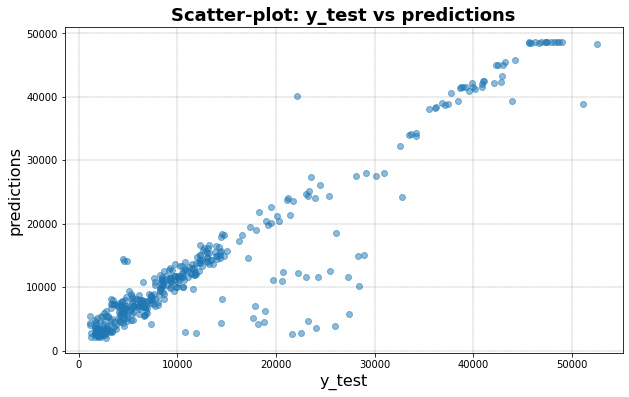

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha= 0.5)
plt.title('Scatter-plot: y_test vs predictions', fontsize=18, fontweight='bold')
plt.xlabel('y_test', fontsize=16)
plt.ylabel('predictions', fontsize=16)
plt.grid(color= 'black', linestyle= '--', linewidth= 0.2)
plt.show()

- Almost linear, suitable model to deploy.

# $Saving Model : Serialization$

In [ ]:
# import pickle

model = Stack_Regressor_Best_tuned
# open a file, where need to store the data
file = open('/content/drive/MyDrive/Colab Notebooks/Case_Study_1/Stack_Reg_model.pkl', 'wb')

# dump to file
pickle.dump(model, file)